In [1]:
import os

def create_sub_folder(parent_folder, subfolder):
    full_path = os.path.join(parent_folder, subfolder)
    os.makedirs(full_path, exist_ok=True)
    print(f"Folder '{full_path}' created successfully.")

# Create main folder and subfolders
create_sub_folder("Student_Performance_Analysis", "Raw_Data")
create_sub_folder("Student_Performance_Analysis", "Cleaned_Data")
create_sub_folder("Student_Performance_Analysis", "Processed_Data")
create_sub_folder("Student_Performance_Analysis", "Visualization_Results")


Folder 'Student_Performance_Analysis/Raw_Data' created successfully.
Folder 'Student_Performance_Analysis/Cleaned_Data' created successfully.
Folder 'Student_Performance_Analysis/Processed_Data' created successfully.
Folder 'Student_Performance_Analysis/Visualization_Results' created successfully.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

student_csv = pd.read_csv("Student_Performance_Analysis/Raw_Data/StudentsPerformance.csv")
student_csv.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Load the dataset
student_csv = pd.read_csv("Student_Performance_Analysis/Raw_Data/StudentsPerformance.csv")

# Step 1: Removing Duplicates
student_csv = student_csv.drop_duplicates()

# Step 2: Handle Missing Values
# Numerical columns: Fill missing values with the mean
numerical_cols = ['math score', 'reading score', 'writing score']
student_csv[numerical_cols] = student_csv[numerical_cols].fillna(student_csv[numerical_cols].mean())

# Step 3: Ensure Correct Data Types
# Convert categorical columns to 'category' dtype
student_csv['gender'] = student_csv['gender'].astype('category')
student_csv['test preparation course'] = student_csv['test preparation course'].astype('category')
student_csv['lunch'] = student_csv['lunch'].astype('category')
student_csv['race/ethnicity'] = student_csv['race/ethnicity'].astype('category')
student_csv['parental level of education'] = student_csv['parental level of education'].astype('category')

# Step 4: Clean categorical columns by encoding them
student_csv['gender'] = student_csv['gender'].apply(lambda x: 1 if x == 'male' else 0)
student_csv['test preparation course'] = student_csv['test preparation course'].map({'none': 0, 'completed': 1})
student_csv['lunch'] = student_csv['lunch'].map({'standard': 0, 'free/reduced': 1})

# Step 5: Handle other categorical data
student_csv['race/ethnicity'] = student_csv['race/ethnicity'].cat.codes
student_csv['parental level of education'] = student_csv['parental level of education'].cat.codes

# Step 6: Remove Outliers Using Z-scores
z_scores = np.abs(stats.zscore(student_csv[numerical_cols]))
student_csv = student_csv[(z_scores < 3).all(axis=1)]

# Step 7: Save the cleaned data
cleaned_file_path = "Student_Performance_Analysis/Cleaned_Data/cleaned_students_performance.csv"
student_csv.to_csv(cleaned_file_path, index=False)

print(f"✅ Cleaned data saved to: {cleaned_file_path}")




✅ Cleaned data saved to: Student_Performance_Analysis/Cleaned_Data/cleaned_students_performance.csv


In [4]:
# Processing Step: Scaling the Data (if needed)
# Step 8: Normalize/Standardize Numerical Columns using StandardScaler
scaler = StandardScaler()
student_csv[numerical_cols] = scaler.fit_transform(student_csv[numerical_cols])

# Step 9: Save the processed data
processed_file_path = "Student_Performance_Analysis/Processed_Data/processed_students_performance.csv"
student_csv.to_csv(processed_file_path, index=False)

print(f"✅ Processed data saved to: {processed_file_path}")

✅ Processed data saved to: Student_Performance_Analysis/Processed_Data/processed_students_performance.csv


In [5]:
student_csv.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,0,0,0.380705,0.178308,0.381755
1,0,2,4,0,1,0.175990,1.447554,1.333370
2,0,1,3,0,0,1.608994,1.800122,1.673233
3,1,0,0,1,0,-1.325252,-0.879397,-1.657421
4,1,2,4,0,0,0.653658,0.601390,0.449728


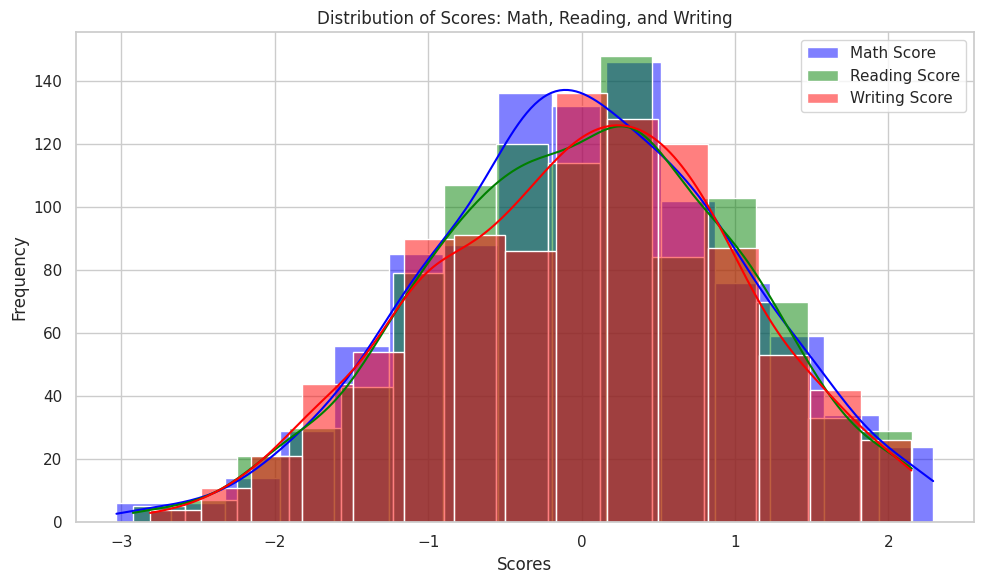

In [6]:

# Step 1: Set up the plotting environment
sns.set(style="whitegrid")

# 1. Distribution of Scores (Math, Reading, Writing)
plt.figure(figsize=(10, 6))
sns.histplot(student_csv['math score'], kde=True, color='blue', label='Math Score', bins=15)
sns.histplot(student_csv['reading score'], kde=True, color='green', label='Reading Score', bins=15)
sns.histplot(student_csv['writing score'], kde=True, color='red', label='Writing Score', bins=15)
plt.title('Distribution of Scores: Math, Reading, and Writing')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.savefig("Student_Performance_Analysis/Visualization_Results/distribution_scores.png")
plt.show()
plt.close()


<ipython-input-7-c811da358e53>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='math score', data=student_csv, palette="Blues")
<ipython-input-7-c811da358e53>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='reading score', data=student_csv, palette="Greens")
<ipython-input-7-c811da358e53>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='writing score', data=student_csv, palette="Reds")


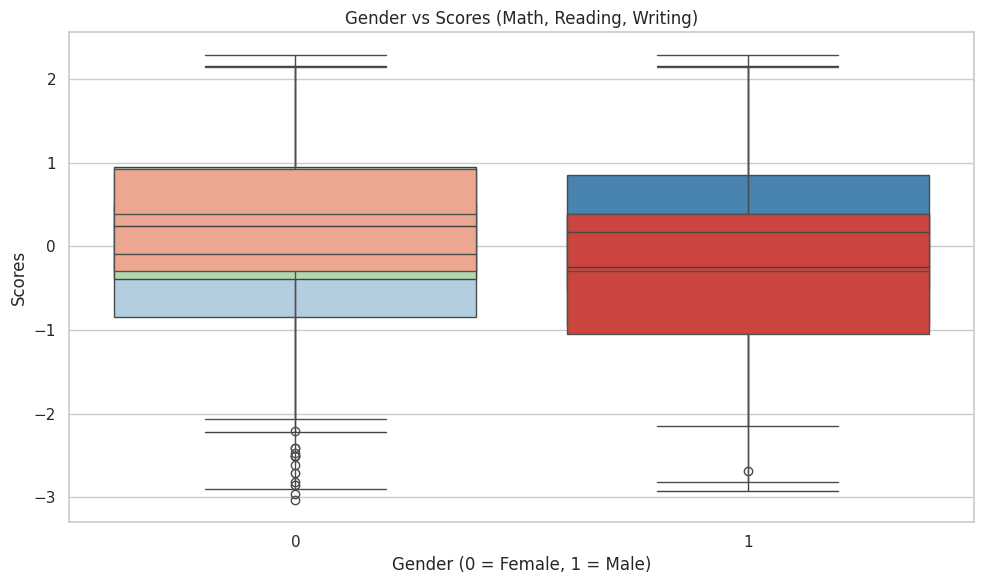

In [7]:

# 2. Gender vs Scores (Comparison of scores based on gender)
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='math score', data=student_csv, palette="Blues")
sns.boxplot(x='gender', y='reading score', data=student_csv, palette="Greens")
sns.boxplot(x='gender', y='writing score', data=student_csv, palette="Reds")
plt.title('Gender vs Scores (Math, Reading, Writing)')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Scores')
plt.tight_layout()
plt.savefig("Student_Performance_Analysis/Visualization_Results/gender_vs_scores.png")
plt.show()

plt.close()


<ipython-input-8-56f288851413>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='test preparation course', y='math score', data=student_csv, palette="Blues")
<ipython-input-8-56f288851413>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='test preparation course', y='reading score', data=student_csv, palette="Greens")
<ipython-input-8-56f288851413>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='test preparation course', y='writing score', data=student_csv, palette="Reds")


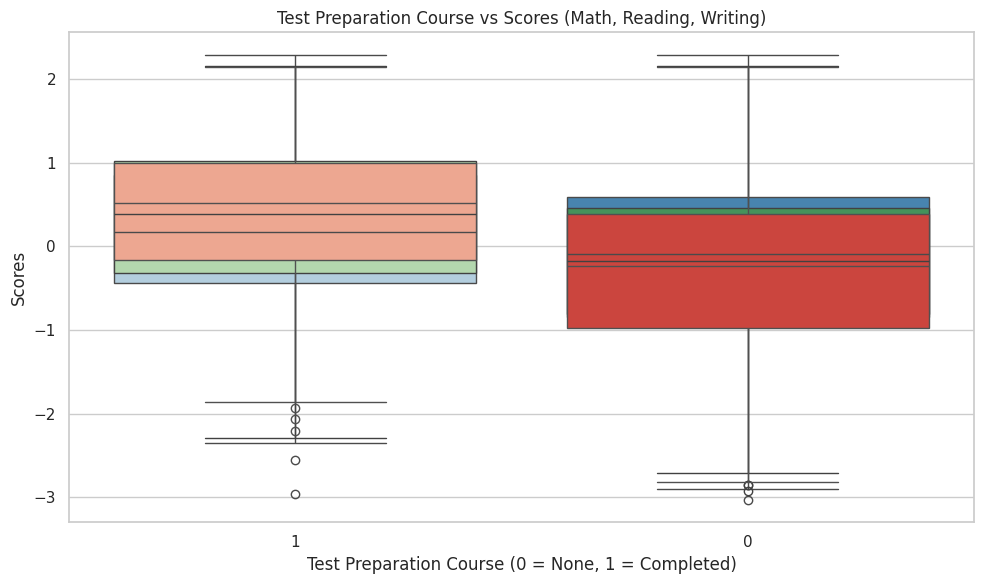

In [8]:

# 3. Test Preparation vs Scores (Comparison of scores based on test preparation completion)
plt.figure(figsize=(10, 6))
sns.boxplot(x='test preparation course', y='math score', data=student_csv, palette="Blues")
sns.boxplot(x='test preparation course', y='reading score', data=student_csv, palette="Greens")
sns.boxplot(x='test preparation course', y='writing score', data=student_csv, palette="Reds")
plt.title('Test Preparation Course vs Scores (Math, Reading, Writing)')
plt.xlabel('Test Preparation Course (0 = None, 1 = Completed)')
plt.ylabel('Scores')
plt.tight_layout()
plt.savefig("Student_Performance_Analysis/Visualization_Results/test_preparation_vs_scores.png")
plt.show()
plt.close()


<ipython-input-9-53467d8a7055>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='lunch', y='math score', data=student_csv, palette="Blues")
<ipython-input-9-53467d8a7055>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='lunch', y='reading score', data=student_csv, palette="Greens")
<ipython-input-9-53467d8a7055>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='lunch', y='writing score', data=student_csv, palette="Reds")


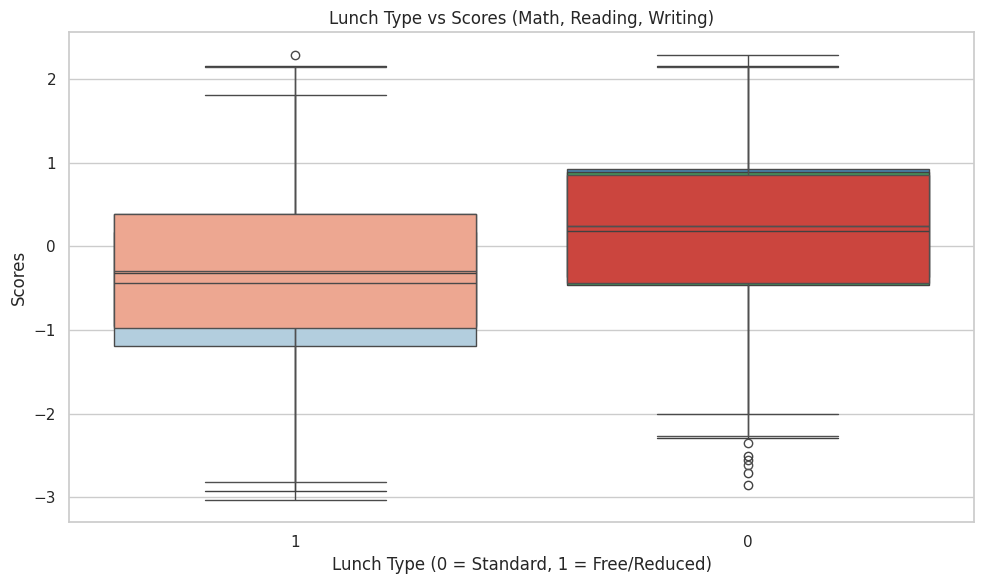

In [9]:

# 4. Lunch Type vs Scores (Comparison of scores based on lunch type)
plt.figure(figsize=(10, 6))
sns.boxplot(x='lunch', y='math score', data=student_csv, palette="Blues")
sns.boxplot(x='lunch', y='reading score', data=student_csv, palette="Greens")
sns.boxplot(x='lunch', y='writing score', data=student_csv, palette="Reds")
plt.title('Lunch Type vs Scores (Math, Reading, Writing)')
plt.xlabel('Lunch Type (0 = Standard, 1 = Free/Reduced)')
plt.ylabel('Scores')
plt.tight_layout()
plt.savefig("Student_Performance_Analysis/Visualization_Results/lunch_vs_scores.png")
plt.show()
plt.close()


<ipython-input-10-491e5edfad55>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='parental level of education', y='math score', data=student_csv, palette="Blues")
<ipython-input-10-491e5edfad55>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='parental level of education', y='reading score', data=student_csv, palette="Greens")
<ipython-input-10-491e5edfad55>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='parental level of education', y='writing score', data=student_csv, palette="Reds")


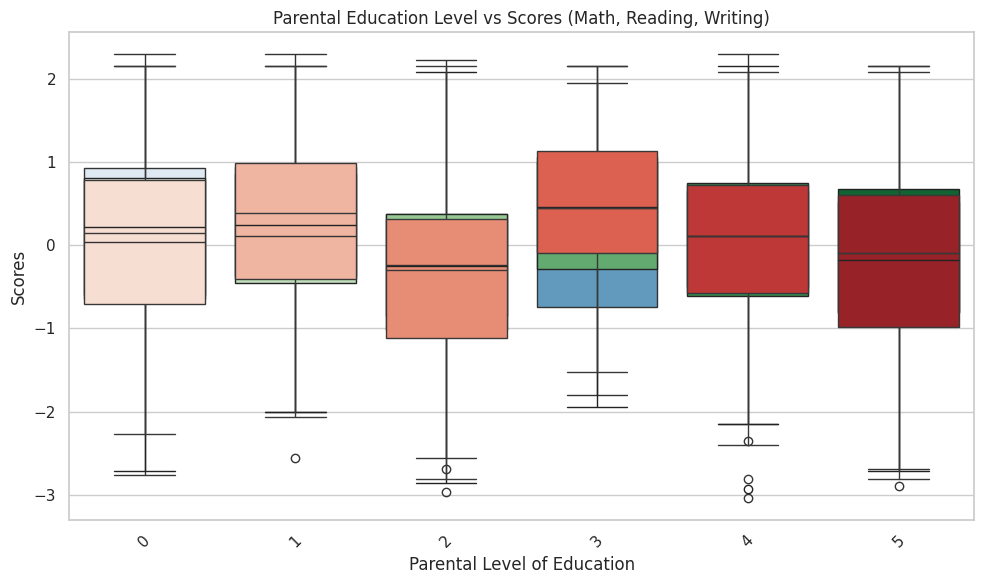

In [10]:

# 5. Parental Education Level vs Scores (Comparison of scores based on parental education level)
plt.figure(figsize=(10, 6))
sns.boxplot(x='parental level of education', y='math score', data=student_csv, palette="Blues")
sns.boxplot(x='parental level of education', y='reading score', data=student_csv, palette="Greens")
sns.boxplot(x='parental level of education', y='writing score', data=student_csv, palette="Reds")
plt.title('Parental Education Level vs Scores (Math, Reading, Writing)')
plt.xlabel('Parental Level of Education')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Student_Performance_Analysis/Visualization_Results/parental_education_vs_scores.png")
plt.show()
plt.close()


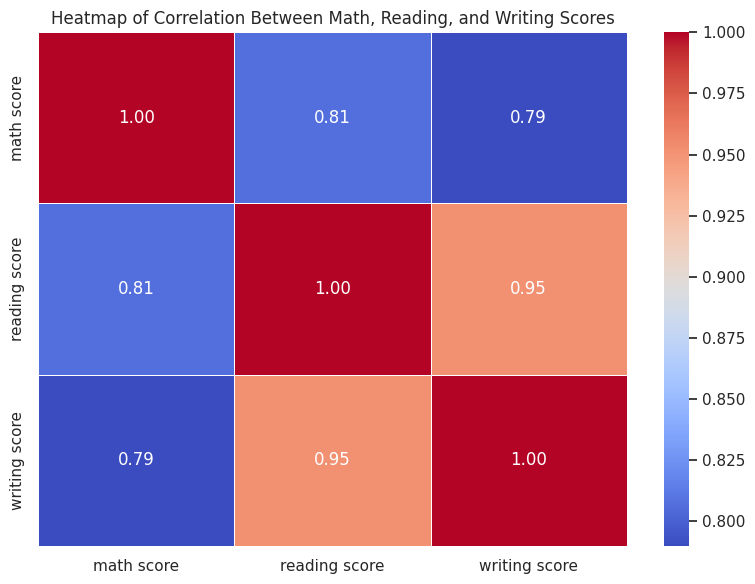

✅ Visualizations saved in the 'Visualizations' folder.


In [11]:

# 6. Heatmap of Correlation between Scores
correlation_matrix = student_csv[['math score', 'reading score', 'writing score']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlation Between Math, Reading, and Writing Scores')
plt.tight_layout()
plt.savefig("Student_Performance_Analysis/Visualization_Results/heatmap_scores_correlation.png")
plt.show()
plt.close()

print("✅ Visualizations saved in the 'Visualizations' folder.")
